### Business Report: Employee Retention Analysis and Predictive Modelling for Salifort Motors

Please find below the business report the full data analysis and ML process for constructing this report, each step is annotated and contains useful graphs, thank you!

#### Executive Summary
Objective:
This analysis aims to predict employee attrition at Salifort Motors by using logistic regression, decision tree and random forest machine learning providing actionable insights on key factors influencing retention. These models enable the company to identify and address factors contributing to employee turnover thereby improving retention rates.

#### Data Analysis Cleaning and Preprocessing

Categorical Variables: One-hot encoding was applied to categorical variables like department and salary to prepare the data for logistic regression.
Normalization: Continuous variables were scaled to improve model performance and interpretation of coefficients.
Model Selection and Metrics
Model Chosen:
A Logistic Regression, Decision Tree and Random Forest model were each selected for its interpretability and simplicity in handling binary classification tasks. Results were then compared to chose the most accurate model.



#### 1. Evaluation Metrics

#### Accuracy: 
Measures the proportion of correct predictions out of total predictions, providing an overall performance score. Suppose the model achieves 92% accuracy, indicating it correctly classifies 92% of employees as likely to leave or stay.

#### Precision: 
Indicates the proportion of employees predicted to leave who actually left. A medium to high weighted precision (85%) means the model effectively identifies true attrition cases, reducing false positives.

#### Recall (Sensitivity): 
Reflects the model’s ability to identify employees who left, showing the proportion of actual attrition cases the model captures. If recall is 85%, the model is successful in identifying those likely to leave but the model results are weighted in favor of correctly predeicting those not likely to leave, helping to ensure at-risk employees are flagged.

#### F1 Score: 
Balances precision and recall, giving a single score that considers both metrics. This is valuable when we need a good balance, especially if the dataset has an uneven distribution of ‘leave’ and ‘stay’ cases as is the case.

Final test sample size used: 2792

#### Below is a comparison of all three ML algorithm methods used to predict employee retention with reference to the above metrics.

        model 	                precision 	recall 	    F1 	        accuracy 	AUC
    	Decision Tree 	        0.972227 	0.914269    0.942307    0.98143     0.971829
       
        model 	                precision 	recall 	    F1 	        accuracy 	AUC
    	Random Forest       	0.966173 	0.917671    0.941298    0.980987    0.955635
       
        model 	                precision 	recall 	    F1 	        accuracy 	AUC
    	Logistic Regression 	0.79 	        0.82 	    0.80 	0.82 	





#### 2. Confusion Matrix Analysis for Logistic Regression The confusion matrix provides further insights:

* True Positives (TP): Employees predicted to leave who did leave: 123

* True Negatives (TN): Employees predicted to stay who did stay: 2172

* False Positives (FP): Employees predicted to leave who actually stayed: 149

* False Negatives (FN): Employees predicted to stay who actually left: 348

By minimizing FP and FN, we can increase precision and recall, respectively, optimizing the model for HR interventions.



#### Insights and Recommendations


#### Model Performance

The analysis used Logistic Regression, Decision Tree, and Random Forest models. Key performance metrics were as follows:

Decision Tree: Highest accuracy at 98.1%, with strong precision (97%) and recall (91%), making it the most effective for predicting attrition at Salifort Motors. 

Random Forest: Similar performance, with 98.0% accuracy and slightly lower precision and recall.

Logistic Regression: Lower overall accuracy (82%) but useful for interpretability.

#### Key Findings:

* Cap the number of projects that employees can work on, all emplloyees who worked on 6+ projects left the company.

* almost half of employees with 5 years of tenure left the company, this demands immediate investigation and may fall beyond the scope of the data provided. 

* Consider promoting employees who have been with the company for atleast four years, or conduct further investigation about why four-year tenured employees are so dissatisfied.

* Either reward employees for working longer hours, or don't require them to do so.

* If employees aren't familiar with the company's overtime pay policies, inform them about this. If the expectations around workload and time off aren't explicit, make them clear.

* Hold company-wide and within-team discussions to understand and address the company work culture, across the board and in specific contexts.

* High evaluation scores should not be reserved for employees who work 200+ hours per month. Consider a proportionate scale for rewarding employees who contribute more/put in more effort.

#### Final Recommendations

Prioritize Workload Management: Introduce balanced project assignments to reduce burnout.

Enhance Satisfaction Programs: Initiate career development and work-life balance programs, especially for high-risk departments.

Implement Retention-focused Rewards: Recognize and reward employees for loyalty and tenure, particularly after four years.

Adopt Predictive Retention Interventions: Utilize the Decision Tree model to proactively identify at-risk employees and implement interventions early.

#### 1. Exploratory Data Analysis
Step one will be installing all necessary Python packages and Libraries to perform in depth analysis and visualisation of the data.


In [11]:
#%pip install seaborn
#%pip install seaborn 
#%pip install numpy
#%pip install pandas
#%pip install scikit-learn
#%pip install xgboost
#%pip install matplotlib

In [12]:
# Import packages

# For data manipulation
import numpy as np
import pandas as pd

# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For displaying all of the columns in dataframes
pd.set_option('display.max_columns', None)

# For data modeling
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# For metrics and helpful functions
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.tree import plot_tree

# For saving models
import pickle 

In [13]:
df = pd.read_csv("HR_capstone_dataset.csv")

We will now use basic funtions to assertain the data types, quantities and useful metrics.

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [16]:
# Gather descriptive statistics about the data
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


We will now use the 'pandas' library to rename necessary columns to correct typos and ensure readability.

In [18]:
# Display all column names
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [19]:
# Rename columns as needed
df = df.rename (columns={'Work_accident': 'work_accident',
                         'average_montly_hours': 'average_monthly_hours',
                         'time_spend_company': 'tenure',
                          'Department': 'department'})



# Display all column names after the update
df.columns


Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'tenure', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

We will now check for missing values and duplicates, removing them from our dataset, 3008 of our entries will be shown to be duplicates. Considering the features of the survey it is extremely unlikely these entries are legitimate.

In [21]:
# Check for missing values
df.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
tenure                   0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

In [22]:
# Check for duplicates
df.duplicated().sum()

3008

In [23]:
# Inspect some rows containing duplicates as needed
df[df.duplicated()].head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low


In [24]:
# Drop duplicates and save resulting dataframe in a new variable as needed
df1 = df.drop_duplicates(keep='first')


# Display first few rows of new dataframe as needed
df1.head(5)

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


5. Using a boxplot we can visualise employee tenure at Salifort Motors, we will then take a look at the exact rate of empoloyees leaving the company and construct a heatmap representing feature correlation to help us investigate further.

<function matplotlib.pyplot.show(close=None, block=None)>

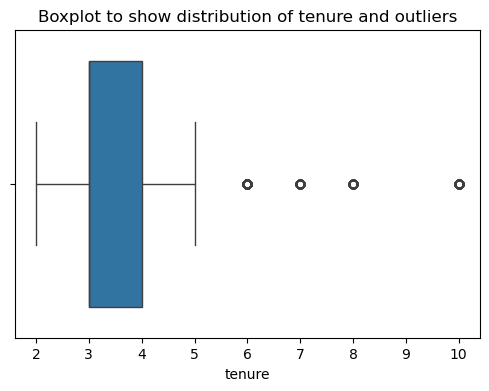

In [26]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
plt.figure(figsize=(6,4))
plt.title('Boxplot to show distribution of tenure and outliers')
sns.boxplot(x=df1['tenure'])


plt.show

An intitial observation indicates that any employee beyond a 5 year tenure is considered a statistical outlier.

In [28]:
# Determine the number of rows containing outliers
percentile_25 = df1['tenure'].quantile(0.25)
percentile_75 = df1['tenure'].quantile(0.75)
iqr = percentile_75 - percentile_25

upper_limit = percentile_75 + 1.5 *iqr
lower_limit = percentile_25 -1.5 * iqr

print('Upper Limit: ', upper_limit)
print('Lower Limit: ', lower_limit)


outliers = df1[(df1['tenure'] < 1.5) | (df1['tenure']>5.5)]

outliers_old = df1[(df1['tenure'] > upper_limit)]

print(len(outliers))
print(len(outliers_old))

dfyl = df1.copy()
dfyl = dfyl[(dfyl['left'] == 1) & (dfyl['tenure'] <= 1.5)]
print('Number of employees who quit before 1.5 years of tenure: ', len(dfyl))
#dfol = dfol[(dfyl['left'] == 1) & (dfyl['tenure'] <= 1.5)]
print('Shortest tenure brfore an employee quit: ', df1['tenure'].min(), 'years')
print ('Average tenure: ',df1['tenure'].mean(), 'years', 'Median tenure: ', df1['tenure'].median(), 'years')
tenure_without_zeros = df1[df1['tenure'] > 0]
print('Corrected modal tenure:', tenure_without_zeros['tenure'].mode()[0], 'years')

Upper Limit:  5.5
Lower Limit:  1.5
824
824
Number of employees who quit before 1.5 years of tenure:  0
Shortest tenure brfore an employee quit:  2 years
Average tenure:  3.3648569760653824 years Median tenure:  3.0 years
Corrected modal tenure: 3 years


In [29]:
# Get numbers of people who left vs. stayed
print(df1['left'].value_counts())

# Get percentages of people who left vs. stayed
print(df1['left'].value_counts(sum) *100)


left
0    10000
1     1991
Name: count, dtype: int64
left
0    83.39588
1    16.60412
Name: proportion, dtype: float64


We see here that 16.6% of employees surveyed left the company, 1991/11991. 

<Axes: xlabel='average_monthly_hours', ylabel='promotion_last_5years'>

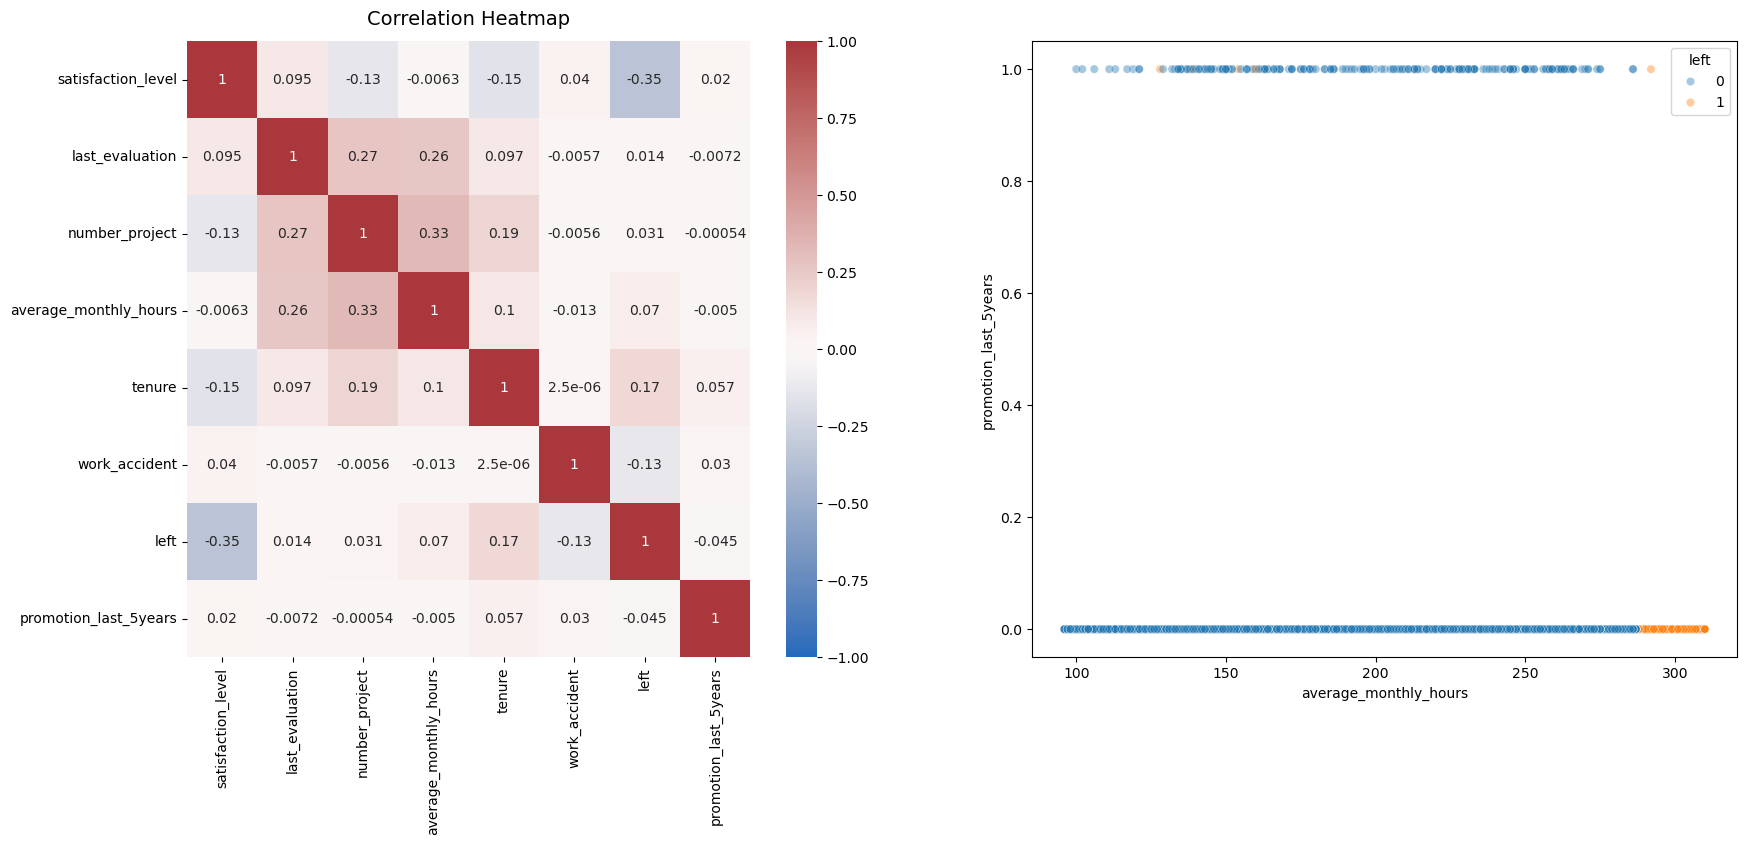

In [31]:

# Filter the DataFrame to include only numeric columns
df_numeric = df1.select_dtypes(include=[np.number])

# Now create the heatmap
fig, ax = plt.subplots(1, 2, figsize=(20,8))
sns.heatmap(df_numeric.corr(), vmin=-1, vmax=1, annot=True, cmap=sns.color_palette("vlag", as_cmap=True), ax=ax[0])
ax[0].set_title('Correlation Heatmap', fontdict={'fontsize':14}, pad=12)

sns.scatterplot(data=df1, x='average_monthly_hours', y='promotion_last_5years', hue='left', alpha=0.4, ax=ax[1])


The above heatmap shows the correlation coefficient between each feature, the higher the value the more influence one exerts on the other. The second graph illustrates monthly hours worked and whether an employee has been promoted within the last five years. As youc an see virtually all employees who left the company had not been promoted and are working 275+ hrs per month.

<Axes: xlabel='number_project', ylabel='Count'>

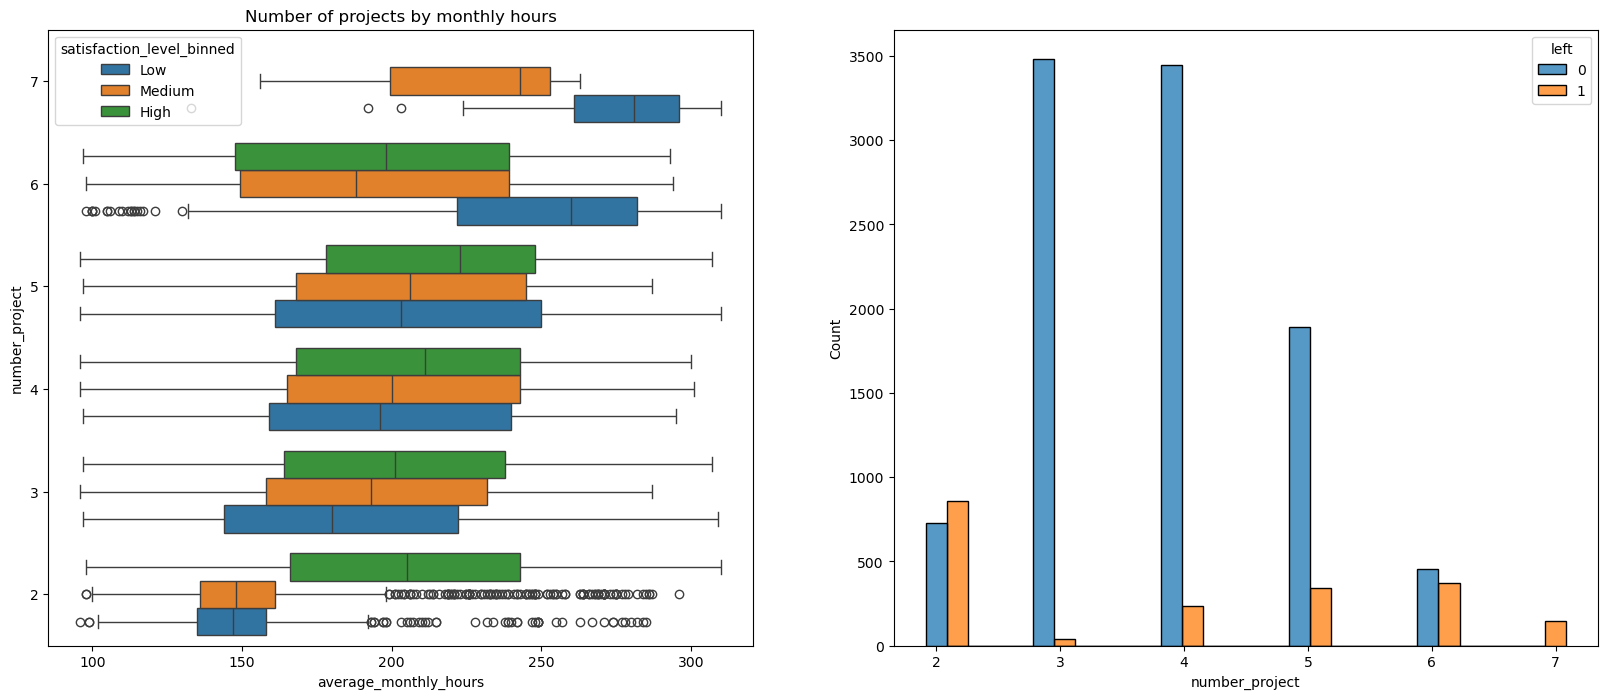

In [33]:
# Create a plot as needed
fig, ax = plt.subplots(1, 2, figsize=(20,8))

df2 = df1.copy()

# Now add the new column
df2['satisfaction_level_binned'] = pd.cut(df2['satisfaction_level'], bins=3, labels=['Low', 'Medium', 'High'])


sns.boxplot(data = df2, y = 'number_project', x = 'average_monthly_hours', orient="h", hue = 'satisfaction_level_binned', ax = ax[0])
ax[0].set_title('Number of projects by monthly hours')
ax[0].invert_yaxis()


tenure_stay = df2[df2['left'] == 1]['number_project']
tenure_leave = df2[df2['left'] == 0]['number_project']
sns.histplot(data = df2, x = 'number_project', hue='left', multiple='dodge', shrink=2, ax=ax[1])



These graphs help to better vizualise employees exiting the company in regards to number of projects being worked on. An unusually large number of employees working on 2 projects have left and all employees working on 7 chose to leave as well as almost half of those working on 6.

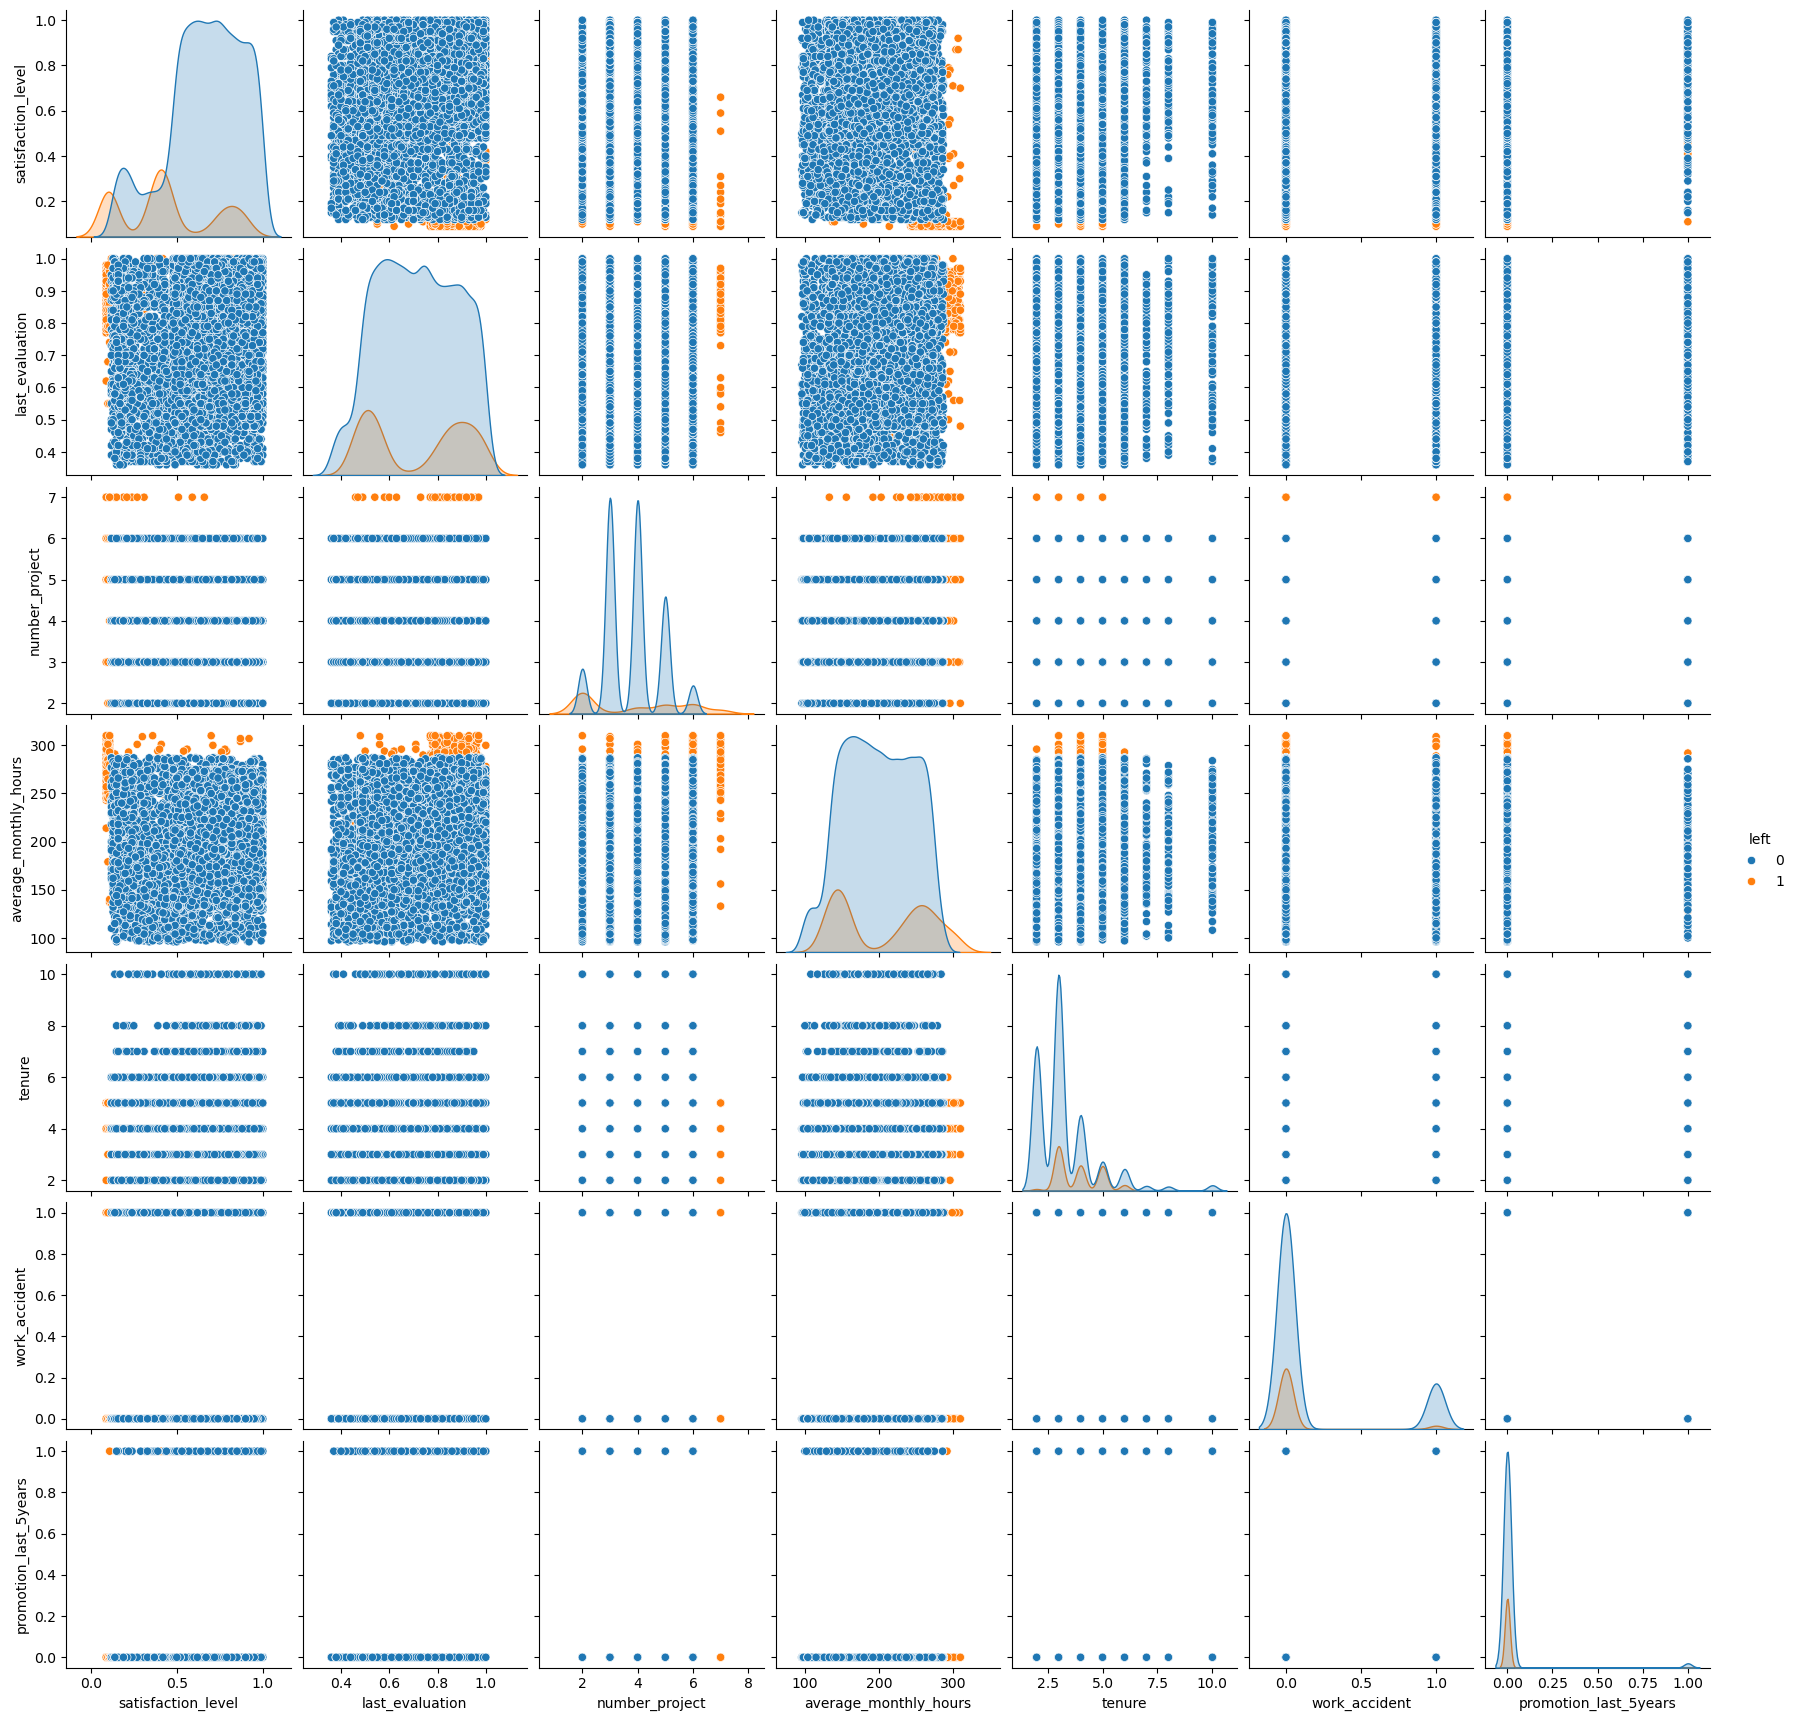

In [36]:
# Create a plot as needed
sns.pairplot(data=df1, hue = 'left')

Something of note this graph illustrates is that almost 50% of employees who have been at the company for 5 years chose to leave (tenure/ count graph).

<Axes: xlabel='tenure', ylabel='satisfaction_level'>

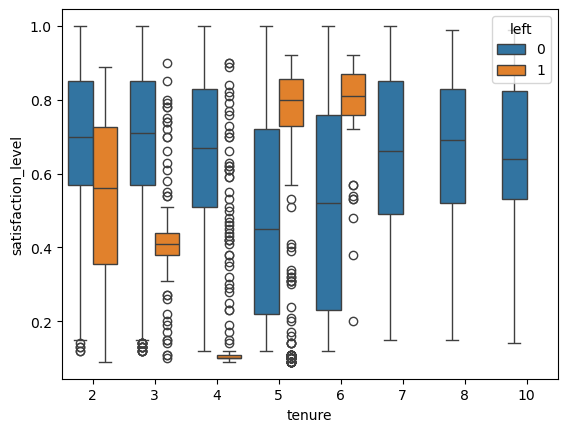

In [38]:
# Create a plot as needed
sns.boxplot(data = df1, x ='tenure', y = 'satisfaction_level', hue = 'left')


An observation worth noting here is the curiously high level of job satisfaction for employees leaving the company after 5 and 6 years of tenure, this requires further analysis that this data cannot provide.

6. We will now look at number of employees leaving by tenure, and then employee count total by tenure.

In [41]:
df1.groupby(['tenure'])['left'].agg("sum")

tenure
2      31
3     874
4     495
5     482
6     109
7       0
8       0
10      0
Name: left, dtype: int64

In [42]:
df1['tenure'].value_counts()

tenure
3     5190
2     2910
4     2005
5     1062
6      542
10     107
7       94
8       81
Name: count, dtype: int64

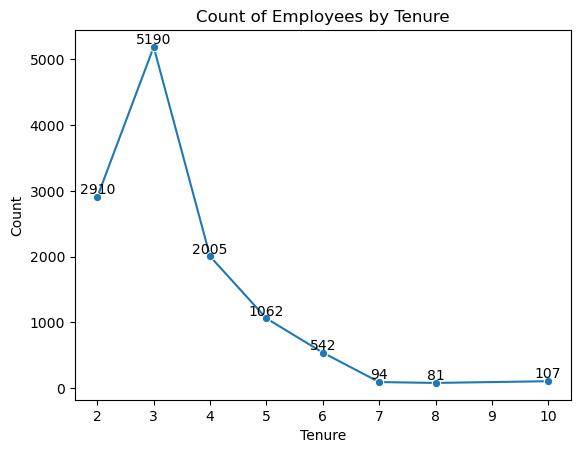

In [43]:
#sns.lineplot(data=df1, x = 'tenure')
tenure_counts = df1['tenure'].value_counts().sort_index()
tenure_counts_df = pd.DataFrame({'tenure': tenure_counts.index, 'count': tenure_counts.values})

# Plot the lineplot
sns.lineplot(data=tenure_counts_df, x='tenure', y='count', marker = 'o')
for x, y in zip(tenure_counts_df['tenure'], tenure_counts_df['count']):
    plt.text(x, y, str(y), ha='center', va='bottom')
plt.xlabel('Tenure')
plt.ylabel('Count')
plt.title('Count of Employees by Tenure')
plt.show()

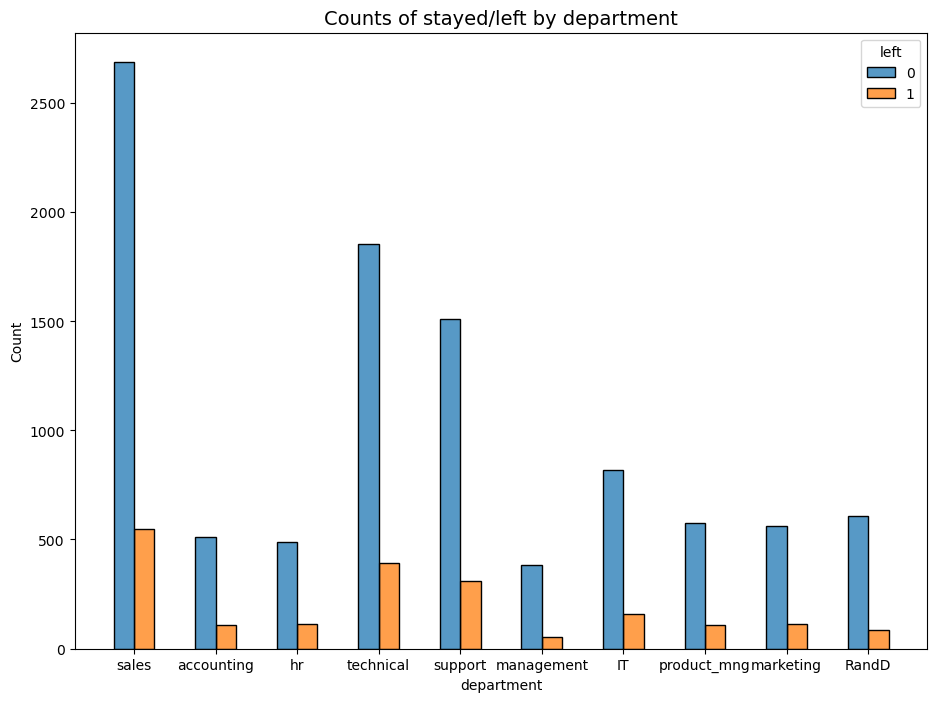

In [44]:
plt.figure(figsize=(11,8))
sns.histplot(data=df1, x='department', hue='left', discrete=1, 
             hue_order=[0, 1], multiple='dodge', shrink=.5)

plt.title('Counts of stayed/left by department', fontsize=14);


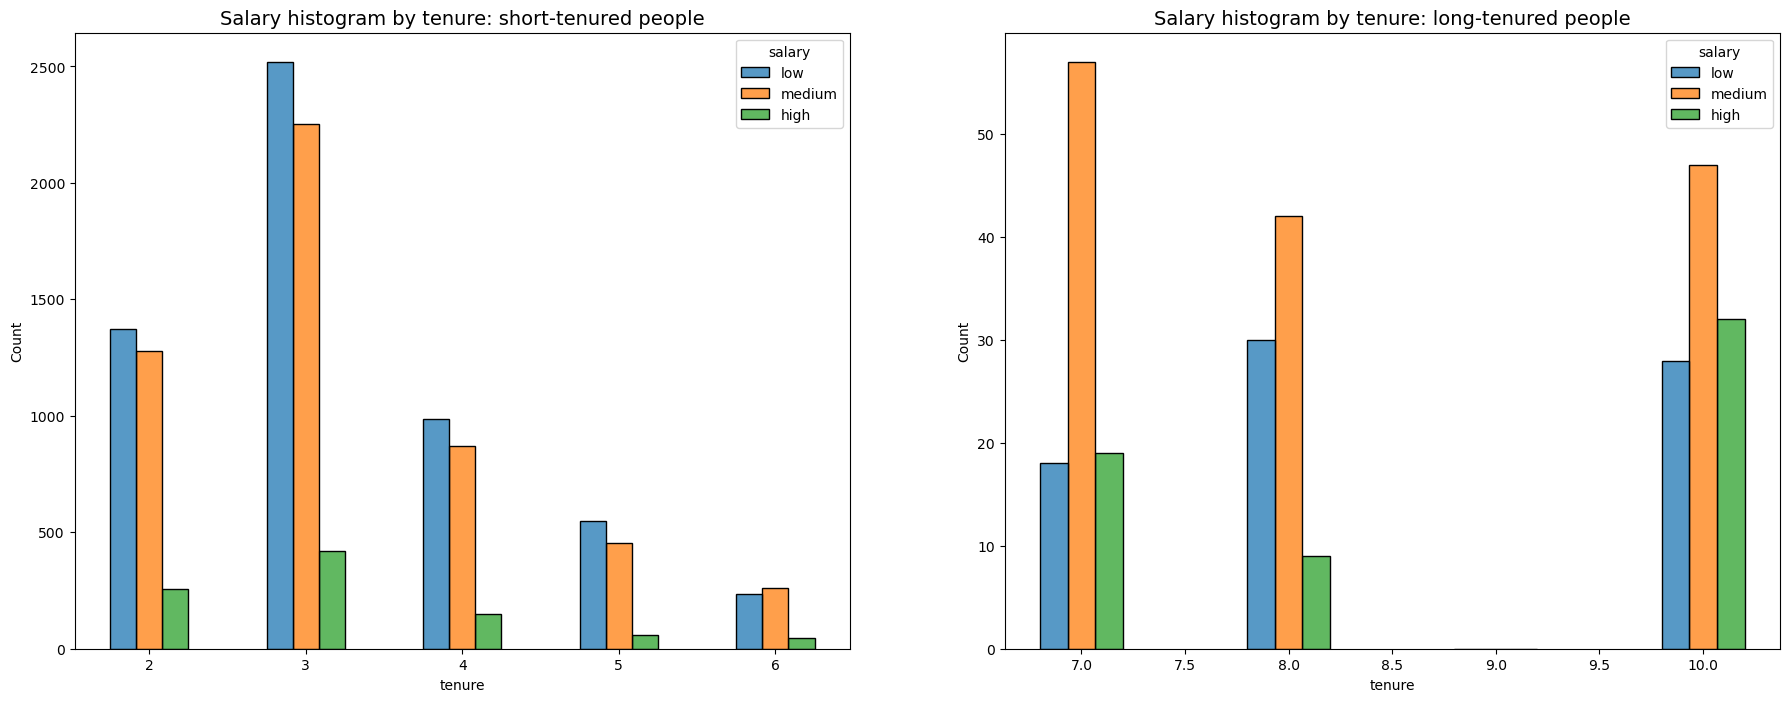

In [45]:
# Set figure and axes
fig, ax = plt.subplots(1, 2, figsize = (22,8))

# Define short-tenured employees
tenure_short = df1[df1['tenure'] < 7]

# Define long-tenured employees
tenure_long = df1[df1['tenure'] > 6]

# Plot short-tenured histogram
sns.histplot(data=tenure_short, x='tenure', hue='salary', discrete=1, 
             hue_order=['low', 'medium', 'high'], multiple='dodge', shrink=.5, ax=ax[0])
ax[0].set_title('Salary histogram by tenure: short-tenured people', fontsize='14')

# Plot long-tenured histogram
sns.histplot(data=tenure_long, x='tenure', hue='salary', discrete=1, 
             hue_order=['low', 'medium', 'high'], multiple='dodge', shrink=.4, ax=ax[1])
ax[1].set_title('Salary histogram by tenure: long-tenured people', fontsize='14');

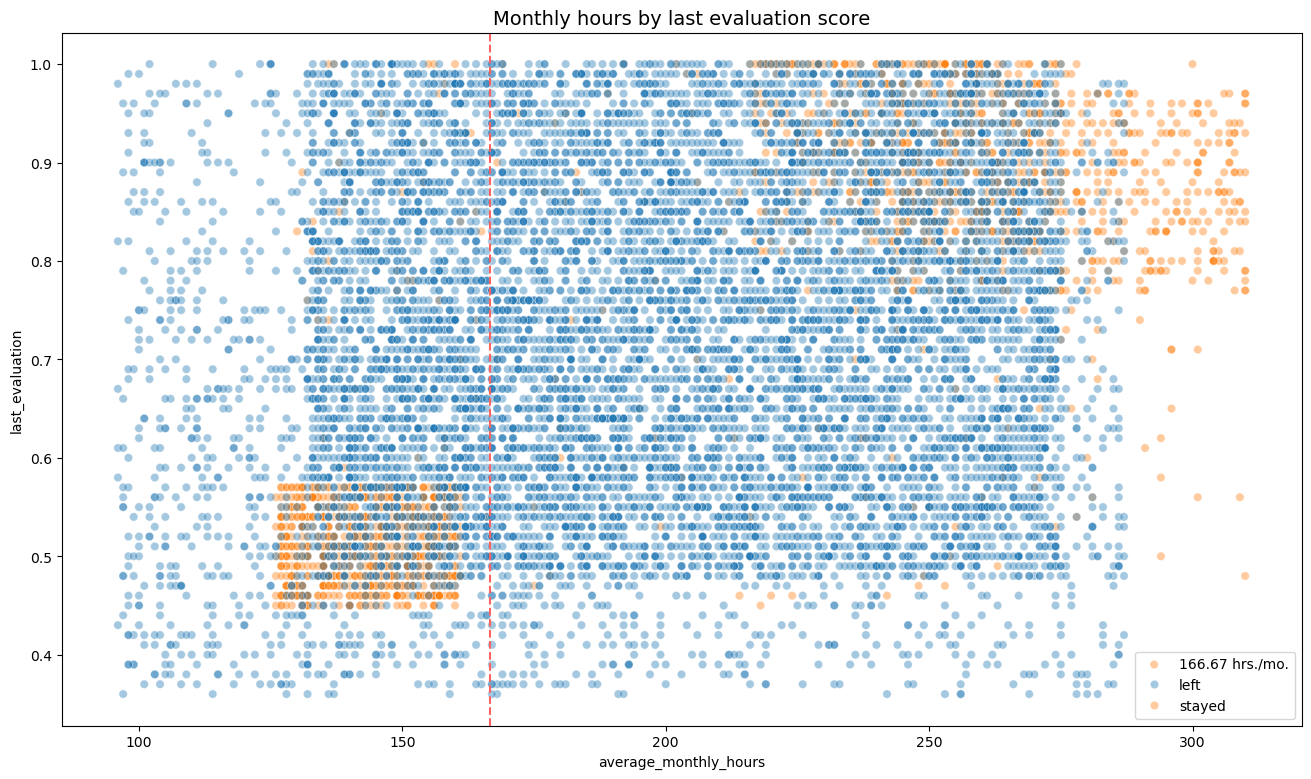

In [46]:
# Create scatterplot of `average_monthly_hours` versus `last_evaluation`
plt.figure(figsize=(16, 9))
sns.scatterplot(data=df1, x='average_monthly_hours', y='last_evaluation', hue='left', alpha=0.4)
plt.axvline(x=166.67, color='#ff6361', label='166.67 hrs./mo.', ls='--')
plt.legend(labels=['166.67 hrs./mo.', 'left', 'stayed'])
plt.title('Monthly hours by last evaluation score', fontsize='14');

This graph illustrates there are two clear groups of employees leaving the company when performance evaluation is measured against average monthly hours worked. As for the lower left block of data samples, its likely these may be employees who are being 'let go' due to poor work performance combined with a lower commitment to work in terms of hours. The second group consists more broadly of highly evaluated employees who are working a range of hours between 250 - 300+ per hour. There are a number of serious concerns to be addressed here.


#### 2. We will now begin creating our first Machine Learning algorithm for the purpose of employee retention prediction, Logistic Regression.

We will need to encode catagorical data so that it can be interpereted correctly by our algorithms, for this I have chosen to use the One Hot Encoder technique.

In [47]:

df_enc = df1.copy()


X_data_to_encode = df_enc[['salary','department']]
X_encoder = OneHotEncoder(drop='first', sparse_output = False)
X_data_encoded = X_encoder.fit_transform(X_data_to_encode)
df_enc1 = pd.DataFrame(data=X_data_encoded, columns = X_encoder.get_feature_names_out())

df_enc.drop(columns = ['salary','department'])

df_enc1 = pd.concat([df_enc.drop(columns = ['salary','department']).reset_index(drop = True), df_enc1], axis = 1)

# Display the new dataframe
df_enc1.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary_low,salary_medium,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.80,0.86,5,262,6,0,1,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.11,0.88,7,272,4,0,1,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.72,0.87,5,223,5,0,1,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.37,0.52,2,159,3,0,1,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


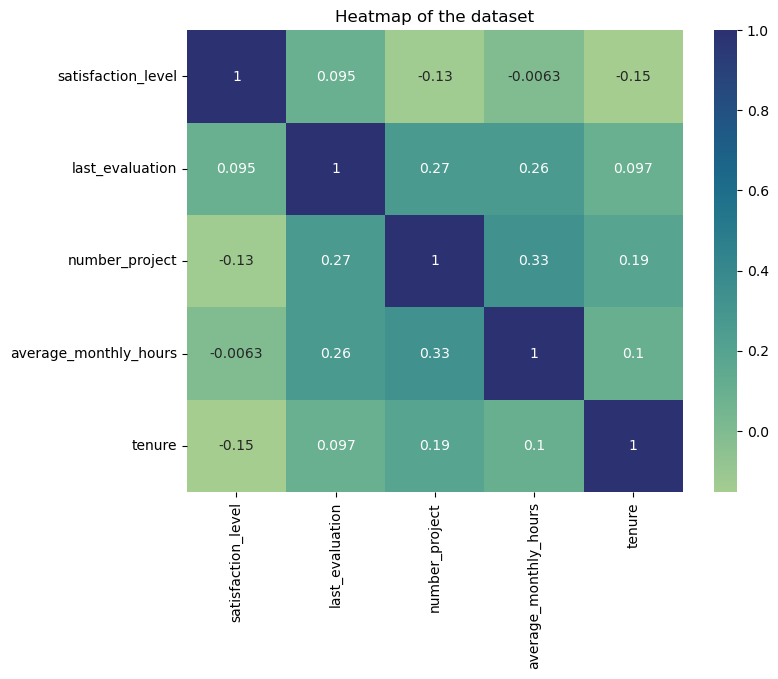

In [48]:
# Create a heatmap to visualize how correlated variables are
plt.figure(figsize=(8, 6))
sns.heatmap(df_enc[['satisfaction_level', 'last_evaluation', 'number_project', 'average_monthly_hours', 'tenure']]
            .corr(), annot=True, cmap="crest")
plt.title('Heatmap of the dataset')
plt.show()

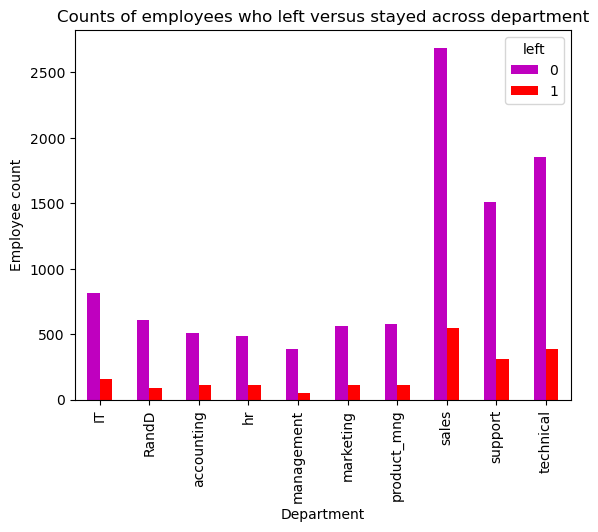

In [49]:
# Create a stacked bart plot to visualize number of employees across department, comparing those who left with those who didn't
# In the legend, 0 (purple color) represents employees who did not leave, 1 (red color) represents employees who left
pd.crosstab(df1['department'], df1['left']).plot(kind ='bar',color='mr')
plt.title('Counts of employees who left versus stayed across department')
plt.ylabel('Employee count')
plt.xlabel('Department')
plt.show()

No department shows a particularly bad churn rate, although sales churn is high, it is relative to department size and sales tends to have a high churn rate in general.

In [51]:
# Select rows without outliers in `tenure` and save resulting dataframe in a new variable
df_logreg = df_enc1[(df_enc1['tenure'] >= lower_limit) & (df_enc1['tenure'] <= upper_limit)]

# Display first few rows of new dataframe
df_logreg.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary_low,salary_medium,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.11,0.88,7,272,4,0,1,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.72,0.87,5,223,5,0,1,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.37,0.52,2,159,3,0,1,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5,0.41,0.50,2,153,3,0,1,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [52]:
# Isolate the outcome variable
y = df_logreg['left']

# Display first few rows of the outcome variable
y.head() 

0    1
2    1
3    1
4    1
5    1
Name: left, dtype: int64

In [53]:
# Select the features you want to use in your model
X = df_logreg.drop('left', axis=1)

# Display the first few rows of the selected features 
X.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,promotion_last_5years,salary_low,salary_medium,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.11,0.88,7,272,4,0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.72,0.87,5,223,5,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.37,0.52,2,159,3,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5,0.41,0.50,2,153,3,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


We will need to split our data into traing and testing sets, we train our models on the training data and then see how they perform against the test set, in this case the test set will be 25% of the data.

In [54]:
# Split the data into training set and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

In [55]:
# Construct a logistic regression model and fit it to the training dataset
log_clf = LogisticRegression(random_state=42, max_iter=1000).fit(X_train, y_train)

After fitting the model to the training data (above) we can now use our model to make predictions on the test data (below).

In [56]:
# Use the logistic regression model to get predictions on the test set
y_pred = log_clf.predict(X_test)

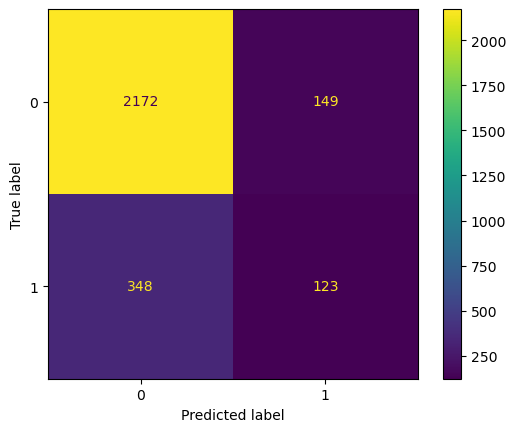

In [57]:
# Compute values for confusion matrix
log_cm = confusion_matrix(y_test, y_pred, labels=log_clf.classes_)

# Create display of confusion matrix
log_disp = ConfusionMatrixDisplay(confusion_matrix=log_cm, 
                                  display_labels=log_clf.classes_)

# Plot confusion matrix
log_disp.plot(values_format='')

# Display plot
plt.show()

The confusion matrix helps us to better visualize the results of our Logistic Regression modelling.

In [58]:
df_logreg['left'].value_counts(normalize=True)

left
0    0.831468
1    0.168532
Name: proportion, dtype: float64

In [59]:
# Create classification report for logistic regression model
target_names = ['Predicted would not leave', 'Predicted would leave']
print(classification_report(y_test, y_pred, target_names=target_names))

                           precision    recall  f1-score   support

Predicted would not leave       0.86      0.94      0.90      2321
    Predicted would leave       0.45      0.26      0.33       471

                 accuracy                           0.82      2792
                macro avg       0.66      0.60      0.61      2792
             weighted avg       0.79      0.82      0.80      2792



#### 3. That's the Logistic Regression model results. We'll now build a Decision Tree model and compare metrics:

In [61]:
# Isolate the outcome variable
y = df_enc1['left']

# Display the first few rows of `y`
y.head()

0    1
1    1
2    1
3    1
4    1
Name: left, dtype: int64

In [62]:
# Select the features
X = df_enc1.drop('left', axis=1)

# Display the first few rows of `X`
X.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,promotion_last_5years,salary_low,salary_medium,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.80,0.86,5,262,6,0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.11,0.88,7,272,4,0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.72,0.87,5,223,5,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.37,0.52,2,159,3,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [63]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=0)

We will use the GridSearchCV funtion to run multiple instances of the decision tree algorithm with various parameters which can be explored below, this willr return the best possible parameters for our model to use to make predictions accurately.

In [64]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {'max_depth': [4, 6, 8, None],
              'min_samples_leaf': [2, 5, 1],
              'min_samples_split': [2, 4, 6]}

# Instantiate the DecisionTreeClassifier
tree1 = DecisionTreeClassifier(random_state=0)

# Define the scoring metrics as a list (not a set)
scoring = ['accuracy', 'recall', 'precision', 'f1', 'roc_auc']

# Create the GridSearchCV instance
grid_search = GridSearchCV(estimator=tree1, 
                           param_grid=param_grid, 
                           scoring=scoring, 
                           cv=5, 
                           refit='accuracy')  # 'accuracy' is used for refitting the model

# Fit the model to the training data
grid_search.fit(X_train, y_train)

# You can now access the best model and results
best_model = grid_search.best_estimator_

# Print out the best parameters and best score for the chosen refit metric (accuracy)
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Accuracy: {grid_search.best_score_}")

# To access the performance for all metrics
print(f"Best Recall: {grid_search.cv_results_['mean_test_recall']}")
print(f"Best Precision: {grid_search.cv_results_['mean_test_precision']}")
print(f"Best F1: {grid_search.cv_results_['mean_test_f1']}")
print(f"Best ROC AUC: {grid_search.cv_results_['mean_test_roc_auc']}")



Best Parameters: {'max_depth': 6, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Accuracy: 0.9816524567782992
Best Recall: [0.91493569 0.91493569 0.91493569 0.91560459 0.91560459 0.91560459
 0.91694911 0.91694911 0.91694911 0.91493794 0.91493794 0.91426904
 0.91091782 0.91091782 0.91091782 0.9182914  0.91695136 0.91628246
 0.9142668  0.9142668  0.9135979  0.91091782 0.91091782 0.91091782
 0.91694911 0.91628022 0.91561132 0.9035465  0.9035465  0.90287536
 0.90756661 0.90756661 0.90756661 0.9115957  0.90958677 0.90825571]
Best Precision: [0.91891517 0.91891517 0.91891517 0.91644669 0.91644669 0.91644669
 0.91914018 0.91914018 0.91914018 0.97155702 0.97155702 0.97222678
 0.97142313 0.97142313 0.97142313 0.9696376  0.9695911  0.97026085
 0.97235029 0.97235029 0.97093621 0.97158293 0.97158293 0.97158293
 0.96615785 0.96678163 0.97095697 0.9416614  0.9416614  0.94876044
 0.96867847 0.96867847 0.96867847 0.89320093 0.91468149 0.9241677 ]
Best F1: [0.91683532 0.91683532 0.91683532 0.91595

In [65]:
tree1.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [66]:
# Check best parameters
grid_search.best_params_

{'max_depth': 6, 'min_samples_leaf': 1, 'min_samples_split': 2}

We now have our best parameters for the Decision Tree to use!

In [67]:
# Check best AUC score on CV
grid_search.best_score_

0.9816524567782992

As you can see, the Decision Tree model yeilds a far higher accuracy of: 98.2% compared to the Logistic Regression Model: 84%.

In [69]:
def make_results(model_name:str, model_object, metric:str):

    # Create dictionary that maps input metric to actual metric name in GridSearchCV
    metric_dict = {'auc': 'mean_test_roc_auc',
                   'precision': 'mean_test_precision',
                   'recall': 'mean_test_recall',
                   'f1': 'mean_test_f1',
                   'accuracy': 'mean_test_accuracy'
                  }

    # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the df with the max(metric) score
    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]

    # Extract Accuracy, precision, recall, and f1 score from that row
    auc = best_estimator_results.mean_test_roc_auc
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy
  
    # Create table of results
    table = pd.DataFrame()
    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision],
                          'recall': [recall],
                          'F1': [f1],
                          'accuracy': [accuracy],
                          'auc': [auc]
                        })
  
    return table

In [70]:
# Get all CV scores
tree1_cv_results = make_results('decision tree cv', grid_search, 'auc')
tree1_cv_results

,model,precision,recall,F1,accuracy,auc
0,decision tree cv,0.972227,0.914269,0.942307,0.98143,0.971829


#### 4. Despite promising results from the Decision Tree model, we will now initiate a Random Forest Classifier to see if the results can be improved:

In [71]:
# Instantiate model
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=0)

# Assign a dictionary of hyperparameters to search over
cv_params = {'max_depth': [3,5, None], 
             'max_features': [1.0],
             'max_samples': [0.7, 1.0],
             'min_samples_leaf': [1,2,3],
             'min_samples_split': [2,3,4],
             'n_estimators': [100,350, 500],
             'random_state': [42]
             } 

# Assign a dictionary of scoring metrics to capture
scoring = {'accuracy': 'accuracy',
                     'precision': 'precision',
                     'recall': 'recall',
                     'f1': 'f1',
                     'roc_auc': 'roc_auc'}

# Instantiate GridSearch
rf1 = GridSearchCV(rf, cv_params, scoring=scoring, cv=2, refit='roc_auc', verbose=2)

We have used GridSearchCV again in order to find the optimal parameters for our model.

In [72]:
%%time
rf1.fit(X_train, y_train) # --> Wall time: ~10min

Fitting 2 folds for each of 162 candidates, totalling 324 fits
[CV] END max_depth=3, max_features=1.0, max_samples=0.7, min_samples_leaf=1, min_samples_split=2, n_estimators=100, random_state=42; total time=   0.2s
[CV] END max_depth=3, max_features=1.0, max_samples=0.7, min_samples_leaf=1, min_samples_split=2, n_estimators=100, random_state=42; total time=   0.2s
[CV] END max_depth=3, max_features=1.0, max_samples=0.7, min_samples_leaf=1, min_samples_split=2, n_estimators=350, random_state=42; total time=   0.9s
[CV] END max_depth=3, max_features=1.0, max_samples=0.7, min_samples_leaf=1, min_samples_split=2, n_estimators=350, random_state=42; total time=   0.9s
[CV] END max_depth=3, max_features=1.0, max_samples=0.7, min_samples_leaf=1, min_samples_split=2, n_estimators=500, random_state=42; total time=   1.2s
[CV] END max_depth=3, max_features=1.0, max_samples=0.7, min_samples_leaf=1, min_samples_split=2, n_estimators=500, random_state=42; total time=   1.3s
[CV] END max_depth=3, max

GridSearchCV(cv=2, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [3, 5, None], 'max_features': [1.0],
                         'max_samples': [0.7, 1.0],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [100, 350, 500],
                         'random_state': [42]},
             refit='roc_auc',
             scoring={'accuracy': 'accuracy', 'f1': 'f1',
                      'precision': 'precision', 'recall': 'recall',
                      'roc_auc': 'roc_auc'},
             verbose=2)

In [73]:
# Check best AUC score on CV
rf1.best_score_

0.9790845214638715

In [74]:
# Check best params
rf1.best_params_

{'max_depth': 5,
 'max_features': 1.0,
 'max_samples': 0.7,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 500,
 'random_state': 42}

In [75]:
# Get all CV scores
rf1_cv_results = make_results('random forest cv', rf1, 'auc')
print(tree1_cv_results)
print(rf1_cv_results)

              model  precision    recall        F1  accuracy       auc
0  decision tree cv   0.972227  0.914269  0.942307   0.98143  0.971829
              model  precision    recall        F1  accuracy       auc
0  random forest cv   0.943336  0.913595  0.928219  0.976537  0.979085


In [76]:
def get_scores(model_name:str, model, X_test_data, y_test_data):
    '''
    Generate a table of test scores.

    In: 
        model_name (string):  How you want your model to be named in the output table
        model:                A fit GridSearchCV object
        X_test_data:          numpy array of X_test data
        y_test_data:          numpy array of y_test data

    Out: pandas df of precision, recall, f1, accuracy, and AUC scores for your model
    '''

    preds = model.best_estimator_.predict(X_test_data)

    auc = roc_auc_score(y_test_data, preds)
    accuracy = accuracy_score(y_test_data, preds)
    precision = precision_score(y_test_data, preds)
    recall = recall_score(y_test_data, preds)
    f1 = f1_score(y_test_data, preds)

    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision], 
                          'recall': [recall],
                          'f1': [f1],
                          'accuracy': [accuracy],
                          'AUC': [auc]
                         })
  
    return table

In [77]:
# Get predictions on test data
rf1_test_scores = get_scores('random forest1 test', rf1, X_test, y_test)
rf1_test_scores

,model,precision,recall,f1,accuracy,AUC
0,random forest1 test,0.966173,0.917671,0.941298,0.980987,0.955635


And here are our final results for the Random Forest Classifier model we've built. As you can see by comparing the results of all three models, the RFC was not an improvement on the Decion Tree, however still yielded strong results ready to publish!